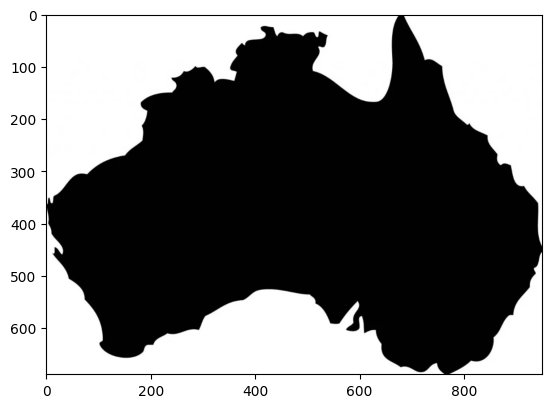

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv_image = cv2.imread("..\Australia.png")
plt.imshow(cv_image)
plt.show()

In [10]:
n, m = cv_image.shape[0],cv_image.shape[1] 
cnt_black = 0
cnt_full = n * m
for x in range(0, n):
    for y in range(0, m):
      if (cv_image[x][y] == np.array([1, 1, 1])).all() == True:
        cnt_black += 1

s_true = cnt_black / cnt_full
print(n, m, s_true)

689 950 0.5887266060652356


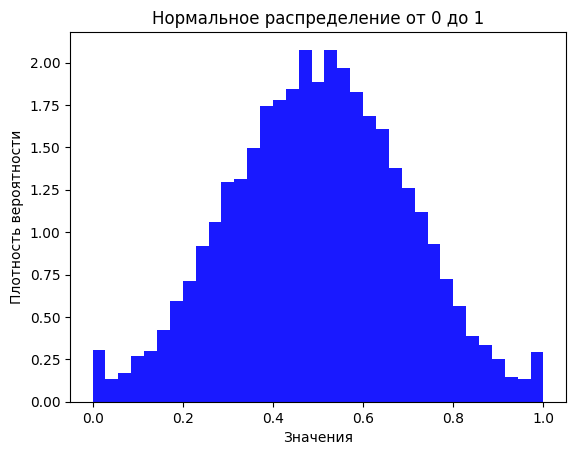

In [11]:
number_points = 10000
rounds = 100
a1 = 0.85
a2 = 0.95
mean = 0.5  # Среднее значение
std_dev = 0.2  # Стандартное отклонение
random_numbers = np.random.normal(mean, std_dev, number_points)
point_sizes = np.clip(random_numbers, 0, 1)



plt.hist(point_sizes, bins=35, density=True, alpha=0.9, color='blue')
plt.title('Нормальное распределение от 0 до 1')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

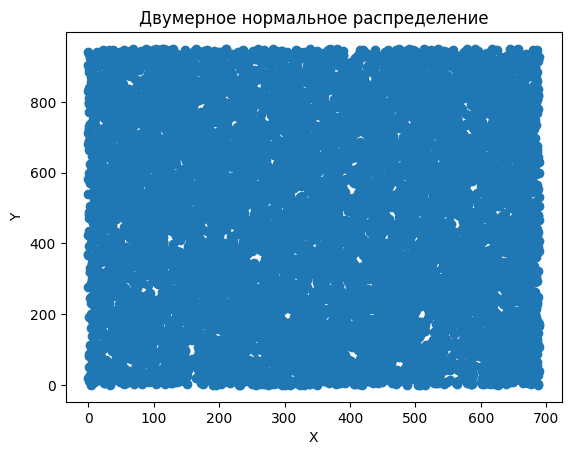

In [12]:
import numpy as np
import matplotlib.pyplot as plt


n, m = cv_image.shape[0],cv_image.shape[1] 

x = np.random.uniform(low=0, high=n, size=number_points)
y = np.random.uniform(low=0, high=m, size=number_points)
number_a1_a2_points = 0
for i in range(0, number_points):
    a = int(x[i])
    b = int(y[i])
    if (cv_image[a][b] == np.array([1, 1, 1])).all() == True and point_sizes[i] >= a1:
        number_a1_a2_points += 1
# Визуализация результатов
plt.scatter(x, y, alpha=1.)
plt.title('Двумерное нормальное распределение')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


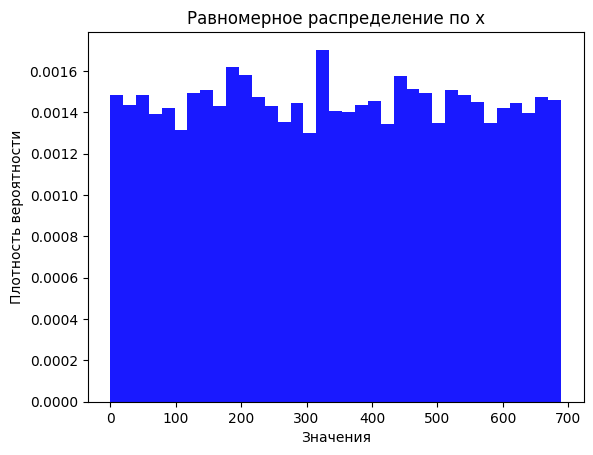

In [13]:
plt.hist(x, bins=35, density=True, alpha=0.9, color='blue')
plt.title('Равномерное распределение по x')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

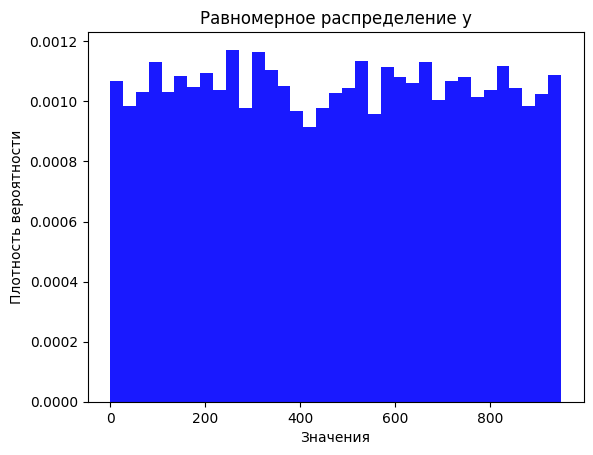

In [14]:
plt.hist(y, bins=35, density=True, alpha=0.9, color='blue')
plt.title('Равномерное распределение y')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

In [15]:
for i in range(0, len(point_sizes)):
    x[i] = int(x[i])
    y[i] = int(y[i])

way = [(x, y)]

In [16]:

v = 40
for i in range(0, rounds):
    new_layerX = []
    new_layerY = []
    for j in  range(0, number_points):
        cur_x = int(way[i][0][j])
        cur_y = int(way[i][1][j])
        if (cv_image[cur_x][cur_y] == np.array([1, 1, 1])).all() == True:
            cur_color = 1
        else:
            cur_color = 0

        flag = False
        while not flag:
            step_x = (int)(np.random.uniform(-v, v))
            step_y = (int)(np.random.uniform(-v, v))
            if  cur_x + step_x < 0:
                step_x *= -1
            if  cur_x + step_x >= n:
                step_x *= -1

            if  cur_y + step_y < 0:
                step_y *= -1
            if  cur_y + step_y >= m:
                step_y *= -1
                
            if (cv_image[cur_x + step_x][cur_y + step_y] == np.array([1, 1, 1])).all() == True:
                if point_sizes[j] < a1:
                    new_layerX.append(cur_x + step_x)
                    new_layerY.append(cur_y + step_y)
                    flag = True
                if a1 <= point_sizes[j] < a2:
                    new_layerX.append(cur_x + step_x)
                    new_layerY.append(cur_y + step_y)
                    flag = True
                if point_sizes[j] >= a2 and cur_color == 1:
                    new_layerX.append(cur_x + step_x)
                    new_layerY.append(cur_y + step_y)
                    flag = True

            else:
                if point_sizes[j] < a1:
                    new_layerX.append(cur_x + step_x)
                    new_layerY.append(cur_y + step_y)
                    flag = True
                if a1 <= point_sizes[j] < a2 and cur_color == 0:
                    new_layerX.append(cur_x + step_x)
                    new_layerY.append(cur_y + step_y)
                    flag = True
                if point_sizes[j] >= a2 and cur_color == 0:
                    new_layerX.append(cur_x + step_x)
                    new_layerY.append(cur_y + step_y)
                    flag = True

    way.append((new_layerX, new_layerY))

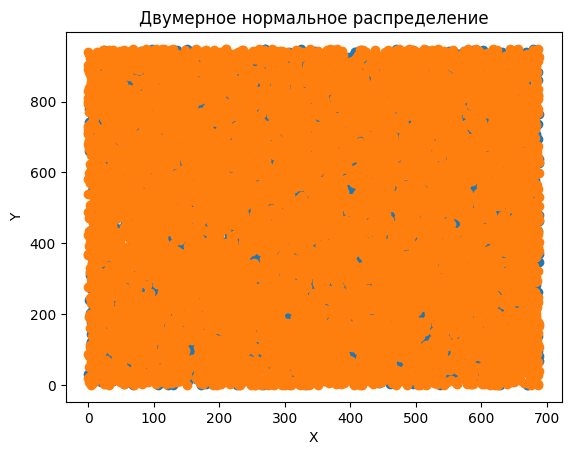

In [17]:
plt.scatter(way[rounds - 1][0], way[rounds - 1][1], alpha=1.)
plt.scatter(way[0][0], way[0][1], alpha=1.)
plt.title('Двумерное нормальное распределение')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
cnt = 0
for i in range(0, len(point_sizes)):
    a = way[rounds-1][0][i]
    b = way[rounds-1][1][i]
    if (cv_image[a][b] == np.array([1, 1, 1])).all() == True and point_sizes[i] >= a1:
        cnt += 1

my_s = cnt / number_points
my_s


0.0307

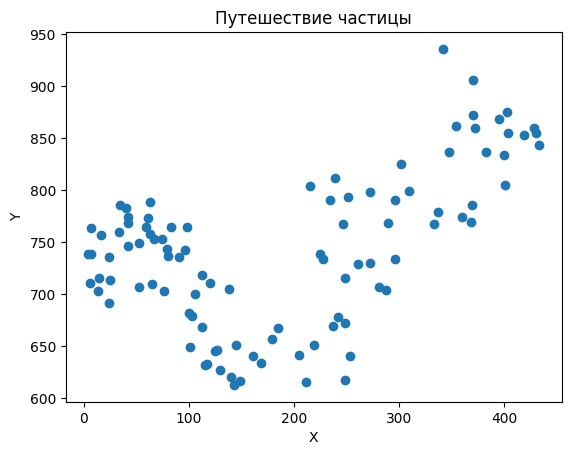

In [19]:
point1_x = []
point1_y = []

for i in range(0, rounds):
    point1_x.append(way[i][0][106])
    point1_y.append(way[i][1][106])

plt.scatter(point1_x, point1_y, alpha=1.)

plt.title('Путешествие частицы')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [30]:
number_a1_a2 = 0
for i in range(0, number_points):
    cur_x = way[rounds - 1][0][i]
    cur_y = way[rounds - 1][1][i]
    if (cv_image[cur_x][cur_y] == np.array([1, 1, 1])).all() == True and point_sizes[i] >= a1 and point_sizes[i] < a2:
        number_a1_a2 += 1


print(number_a1_a2 / number_a1_a2_points)

15.28368794326241


In [31]:
eff = []
n, m = cv_image.shape[0],cv_image.shape[1] 

x = np.random.uniform(low=0, high=n, size=number_points)
y = np.random.uniform(low=0, high=m, size=number_points)
for k in range(1, 40):
    a2 = a2 + 0.03 / 4.  * k
    number_a1_a2_points = 0
    for i in range(0, number_points):
        if point_sizes[i] >= a1 and point_sizes[i] < a2 and ((cv_image[int(x[i])][int(y[i])] == np.array([1, 1, 1])).all() == False):
            number_a1_a2_points += 1
    print(number_a1_a2_points)
    way = [(x, y)]
    
    v = 40
    rounds = 10
    for i in range(0, rounds):
        new_layerX = []
        new_layerY = []
        for j in  range(0, number_points):
            cur_x = int(way[i][0][j])
            cur_y = int(way[i][1][j])
            if (cv_image[cur_x][cur_y] == np.array([1, 1, 1])).all() == True:
                cur_color = 1
            else:
                cur_color = 0

            flag = False
            while not flag:
                step_x = (int)(np.random.uniform(-v, v))
                step_y = (int)(np.random.uniform(-v, v))
                if  cur_x + step_x < 0:
                    step_x *= -1
                if  cur_x + step_x >= n:
                    step_x *= -1

                if  cur_y + step_y < 0:
                    step_y *= -1
                if  cur_y + step_y >= m:
                    step_y *= -1
                    
                if (cv_image[cur_x + step_x][cur_y + step_y] == np.array([1, 1, 1])).all() == True:
                    if point_sizes[j] < a1:
                        new_layerX.append(cur_x + step_x)
                        new_layerY.append(cur_y + step_y)
                        flag = True
                    if a1 <= point_sizes[j] < a2:
                        new_layerX.append(cur_x + step_x)
                        new_layerY.append(cur_y + step_y)
                        flag = True
                    if point_sizes[j] >= a2 and cur_color == 1:
                        new_layerX.append(cur_x + step_x)
                        new_layerY.append(cur_y + step_y)
                        flag = True

                else:
                    if point_sizes[j] < a1:
                        new_layerX.append(cur_x + step_x)
                        new_layerY.append(cur_y + step_y)
                        flag = True
                    if a1 <= point_sizes[j] < a2 and cur_color == 0:
                        new_layerX.append(cur_x + step_x)
                        new_layerY.append(cur_y + step_y)
                        flag = True
                    if point_sizes[j] >= a2 and cur_color == 0:
                        new_layerX.append(cur_x + step_x)
                        new_layerY.append(cur_y + step_y)
                        flag = True

        way.append((new_layerX, new_layerY))


    number_a1_a2 = 0
    for i in range(0, number_points):
        cur_x = way[rounds - 1][0][i]
        cur_y = way[rounds - 1][1][i]
        if (cv_image[cur_x][cur_y] == np.array([1, 1, 1])).all() == False and point_sizes[i] >= a1 and point_sizes[i] < a2:
            number_a1_a2 += 1

        
    eff.append((number_a1_a2_points - number_a1_a2 )/ number_a1_a2_points)
    print((number_a1_a2_points - number_a1_a2 )/ number_a1_a2_points)


1483
0.43762643290627107
1602
0.4444444444444444
1797
0.4507512520868113
2020
0.4430693069306931
2276
0.45782073813708263
2564
0.4504680187207488
2844
0.44163150492264414
3084
0.4497405966277562
3262
0.45462906192519925
3365
0.45586924219910846
3422
0.44593804792518993
3446
0.4495066744051074
3446
0.4408009286128845
3446
0.4492164828786999
3446
0.4376088218224028
3446
0.4529889727219965
3446
0.4512478235635519
3446
0.4451538015089959
3446
0.4541497388276262
3446
0.4489262913522925
3446
0.4291932675565873
3446
0.4477655252466628
3446
0.4495066744051074
3446
0.4492164828786999
3446
0.4524085896691817
3446
0.4509576320371445
3446
0.4474753337202554
3446
0.4532791642484039
3446
0.4596633778293674
3446
0.4471851421938479
3446
0.4471851421938479
3446
0.4483459082994777
3446
0.4495066744051074
3446
0.4521183981427742
3446
0.4506674405107371
3446
0.4448636099825885
3446
0.4451538015089959
3446
0.4422518862449216
3446
0.4437028438769588


In [32]:
diff = []
for i in range(1, 40):
    diff.append(i * 0.03 / 4.)

diff

[0.0075,
 0.015,
 0.0225,
 0.03,
 0.0375,
 0.045,
 0.0525,
 0.06,
 0.0675,
 0.075,
 0.08249999999999999,
 0.09,
 0.0975,
 0.105,
 0.11249999999999999,
 0.12,
 0.1275,
 0.135,
 0.1425,
 0.15,
 0.1575,
 0.16499999999999998,
 0.1725,
 0.18,
 0.1875,
 0.195,
 0.20249999999999999,
 0.21,
 0.2175,
 0.22499999999999998,
 0.23249999999999998,
 0.24,
 0.2475,
 0.255,
 0.2625,
 0.27,
 0.27749999999999997,
 0.285,
 0.2925]

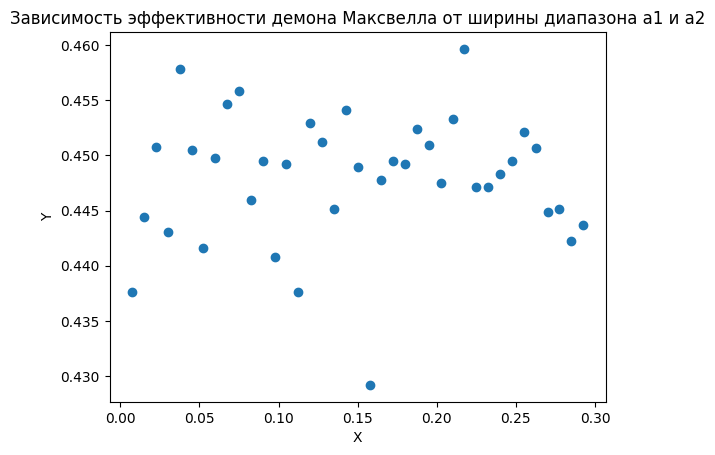

In [33]:
plt.scatter(diff, eff, alpha=1.)

plt.title('Зависимость эффективности демона Максвелла от ширины диапазона a1 и a2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
answers = []
for i in range(0, 100):
    a1 = 0.3
    a2 = 0.5
    mean = 0.5 # Среднее значение
    std_dev = 0.2  # Стандартное отклонение
    number_points = 10000
    random_numbers = np.random.normal(mean, std_dev, number_points)
    point_sizes = np.clip(random_numbers, 0, 1)

    x = np.random.uniform(low=0, high=n, size=number_points)
    y = np.random.uniform(low=0, high=m, size=number_points)


    cnt1 = 0
    cnt2 = 0
    for j in range(0, number_points):
        if point_sizes[i] >= a2:
            cnt2 += 1
            if (cv_image[int(x[j])][int(y[j])] == np.array([1, 1, 1])).all() == True:
                cnt1 += 1

    if cnt1 != 0:
        answers.append(cnt1/cnt2) 

In [25]:
import pandas as pd
data = pd.DataFrame({'square': answers})

In [26]:
data.describe()

,square
count,44.000000
mean,0.588184
std,0.004765
min,0.577700
25%,0.585225
50%,0.588500
75%,0.591075
max,0.598500


In [27]:
data.mean()

square    0.588184
dtype: float64

In [28]:
data.std()

square    0.004765
dtype: float64

In [29]:
np.var(answers)

2.218588326446288e-05